# First Step into machine Learning : regression models

Checkpoint Objective :Regression

This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

# ___

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply linear regression to your training set. 

5. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multiple-linear regression and compare it to the linear model. 

7. Apply polynomial regression and compare it to linear and multilinear regression. 

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown.

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: c:\users\beit\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: c:\users\beit\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [24]:
#libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

1. Explore this dataset using what you have learned in data preprocessing and data visualization

In [4]:
df= pd.read_csv('kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5154,3705900130,20140523T000000,377691.0,5,1.75,2120,8399,1.0,0,0,...,7,1320,800,1942,0,98133,47.7621,-122.335,2120,8398
13200,2768100180,20140606T000000,595000.0,4,2.50,1990,2175,2.0,0,0,...,8,1680,310,2005,0,98107,47.6696,-122.371,1560,2087
5984,3298300420,20150331T000000,354000.0,3,1.00,990,7590,1.0,0,0,...,6,990,0,1959,0,98008,47.6228,-122.121,1100,7590
20097,5693500846,20150420T000000,667000.0,3,1.75,1370,1921,3.0,0,0,...,8,1370,0,2007,0,98103,47.6595,-122.351,1370,4000
17607,4046601460,20140606T000000,407193.0,4,2.00,1880,14653,2.0,0,0,...,8,1880,0,1978,0,98014,47.6959,-121.921,1750,14858
11719,4078300024,20140725T000000,590000.0,4,2.75,2160,4205,1.0,0,3,...,7,1080,1080,1969,0,98125,47.7081,-122.276,2450,6014
1353,2423020260,20140814T000000,461000.0,3,2.25,1850,7923,1.0,0,0,...,7,1150,700,1977,0,98033,47.7011,-122.171,1780,7420
17401,6819100020,20140529T000000,1425000.0,4,4.25,4960,6000,2.5,0,0,...,11,3680,1280,1909,2003,98109,47.6437,-122.356,2160,4080
5659,9346930250,20140926T000000,668500.0,4,2.25,2290,9546,1.0,0,0,...,8,1780,510,1976,0,98006,47.5617,-122.130,2360,8864
6916,9359100101,20150414T000000,1370000.0,5,2.25,3510,13843,1.0,0,2,...,8,1850,1660,1959,0,98040,47.5817,-122.246,2680,8750


In [5]:
df.shape

(21613, 21)

In [6]:
#checking for any nan values
df.isnull().sum() #there is no nan values which is perfect!!

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe() #i'm noticing there's a huge difference between the values so we need to scale them 
#edit: i wrote the code for the scaling but i decided to not scale my data for the visualization yet

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.dtypes #i'm also going to drop the column date because i's an object 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
#scaler = StandardScaler() #first i'll create the scaler

#now i'm fitting and transforming my data 
#X = scaler.fit_transform(df)

#X

In [11]:
#scaled_df = pd.DataFrame(X, columns=df.columns)
#what i'm doing here is returning it to a dataframe so i can see it better

#scaled_df #as we can see more clearly here, our data is scaled properly

In [12]:
#scaled_df.describe()

In [13]:
column_names = df.columns.tolist()
print(column_names)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


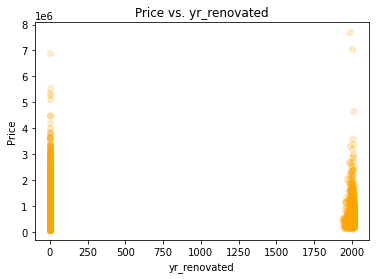

In [14]:
plt.scatter(df['yr_renovated'], df['price'], alpha=0.2, c='orange')
plt.xlabel('yr_renovated')
plt.ylabel('Price')
plt.title('Price vs. yr_renovated')
plt.show()

<ipython-input-15-6779b584adf5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],hist = True, label = 'Price')


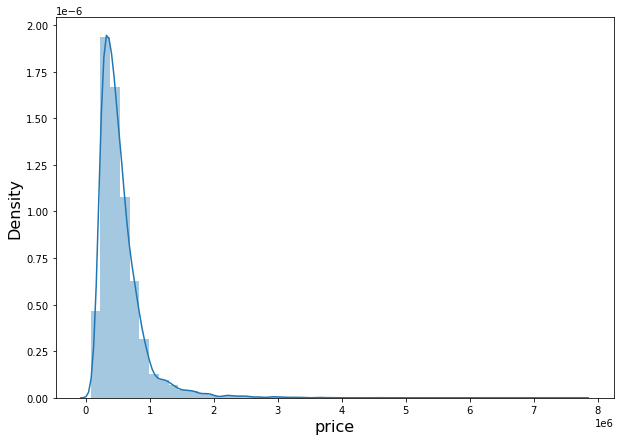

In [15]:
# the distribution of price using seaborn:
plt.figure(figsize = (10,7))
sns.distplot(df['price'],hist = True, label = 'Price')
plt.xlabel('price', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.show()

Comment: Based on the figure we see that

-all distibution of the prices is between 0 and 1 

-Prices around 0.5 appear more.


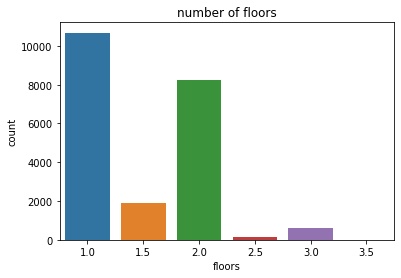

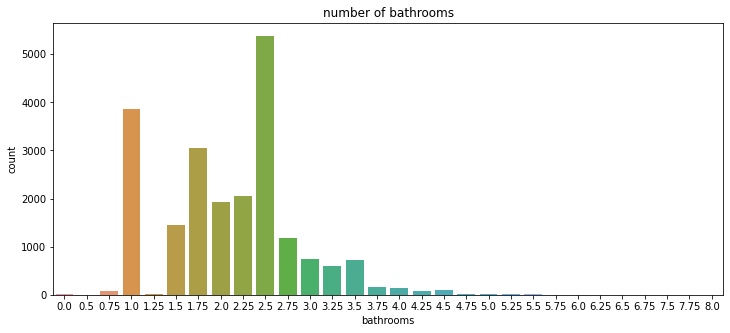

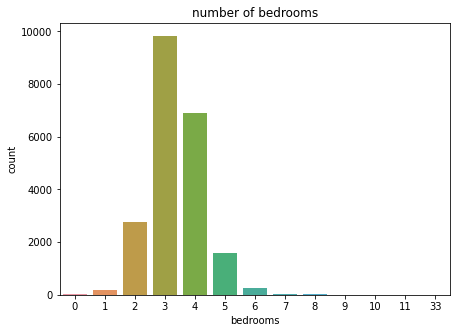

In [16]:
# visualizing the number of floors
sns.countplot(data=df, x='floors')
plt.title('number of floors')
plt.show()

# visualizing the number of batgrooms
plt.figure(figsize = (12,5))
sns.countplot(data=df, x='bathrooms')
plt.title('number of bathrooms')
plt.show()

# visualizing the number of bedrooms
plt.figure(figsize = (7,5))
sns.countplot(data=df, x='bedrooms')
plt.title('number of bedrooms')
plt.show()
 


<AxesSubplot:>

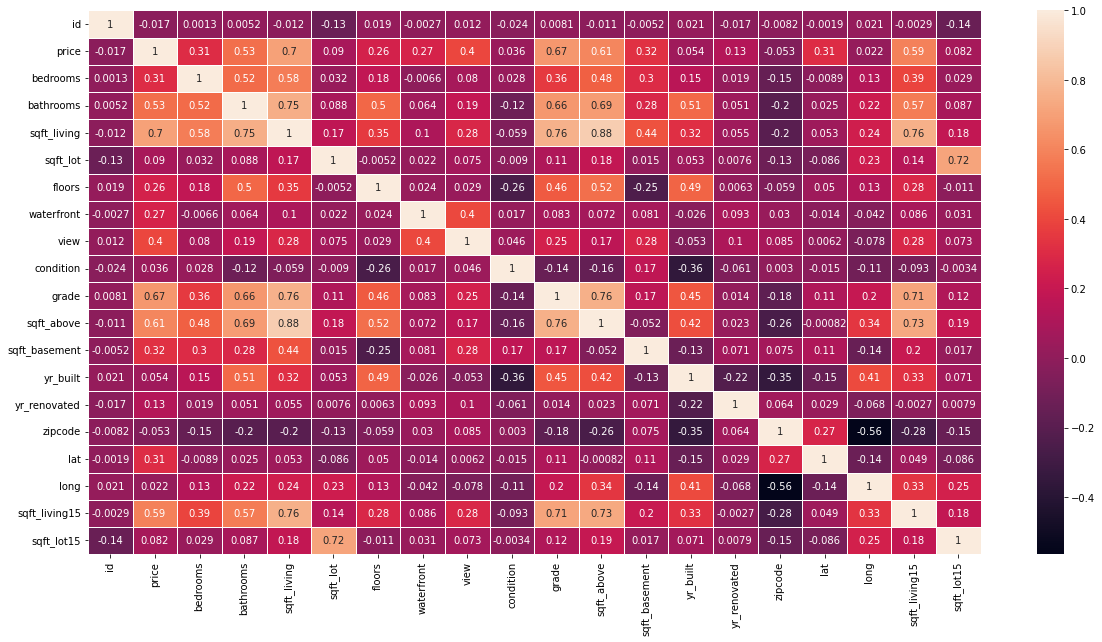

In [17]:
#i'm going to verify the correlation between the variables

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), linewidths = 0.5, annot = True)

In [18]:
df.corr()["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

we can see that 
*price is most correlated with :sqft_living ,sqft_above ,grade ,sqft_living15
    
*not corellated with :zipcode,id         


In [19]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [21]:
#with that conclusion i'm going to drop the variables that are least correlated with price

df.drop(['id','date', 'zipcode'],axis=1, inplace=True)

In [22]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


2-Write a paragraph selecting the most important features (feature selection).



I'm selecting "price" as the main feature, as it likely serves as the target variable in predictive models, allowing for a deeper understanding of pricing dynamics and better decision-making.

3-Split your dataset into a training set and a testing set.

In [42]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 40)
     

In [43]:
X_train = train_set.drop('price', axis = 1)
y_train = train_set['price']
X_test = test_set.drop('price', axis = 1)
y_test = test_set['price']

In [44]:
scaler = StandardScaler() #first i'll create the scaler

#now i'm fitting and transforming my data 
scaled_data = scaler.fit_transform(df)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
print(X_train.shape, X_test.shape)

(17290, 17) (4323, 17)


4-Apply linear regression to your training set.

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

model.fit(X_train, y_train)#fit the model

y_pred = model.predict(X_test)#create a prediction
y_pred

array([996976.87290818, 739618.99858872, 338293.73299767, ...,
       601137.89941657, 787901.35715138, 414579.54554248])

5-plot a linear regression

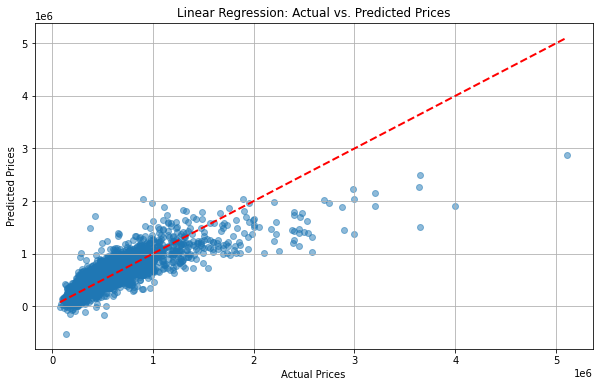

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs. Predicted Prices")
plt.grid(True)

# Add a diagonal line for reference 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

6-Measure the performance of linear regression using the testing set.

In [59]:
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 38376551875.178955
R-squared: 0.6949339114049322


7-Apply multiple-linear regression and compare it to the linear model.

In [63]:
# first we'll need to reate a multiple-linear regression model
multiple_linear_model = LinearRegression()

In [64]:
multiple_linear_model.fit(X_train, y_train)#fit the model

y_pred_multiple = multiple_linear_model.predict(X_test)#make predictions

# now we evaluate the model
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("Multiple-Linear Regression Mean Squared Error:", mse_multiple)
print("Multiple-Linear Regression R-squared:", r2_multiple)

# Compare with the performance of the simple linear regression model
print("\nSimple Linear Regression Mean Squared Error:", mse)
print("Simple Linear Regression R-squared:", r2)


Multiple-Linear Regression Mean Squared Error: 38376551875.178955
Multiple-Linear Regression R-squared: 0.6949339114049322

Simple Linear Regression Mean Squared Error: 38376551875.178955
Simple Linear Regression R-squared: 0.6949339114049322


it looks like we have the same performance?? correct me if i'm wrong

8-Apply polynomial regression and compare it to linear and multilinear regression.

In [73]:
# Create polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly_degree = 3  
poly_features = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [74]:
# Create and fit a linear regression model to the polynomial features
poly_linear_model = LinearRegression()
poly_linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [75]:
# Make predictions on the test data using the polynomial regression model
y_pred_poly = poly_linear_model.predict(X_test_poly)

In [76]:
# Evaluate the performance of the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression Mean Squared Error:", mse_poly)
print("Polynomial Regression R-squared:", r2_poly)

Polynomial Regression Mean Squared Error: 4.9091293917836735e+26
Polynomial Regression R-squared: -3902406101594415.0


In [77]:
# Compare with the performance of the simple linear regression model
print("\nSimple Linear Regression Mean Squared Error:", mse)
print("Simple Linear Regression R-squared:", r2)


Simple Linear Regression Mean Squared Error: 38376551875.178955
Simple Linear Regression R-squared: 0.6949339114049322


In [78]:
# Compare with the performance of the multiple-linear regression model
print("\nMultiple-Linear Regression Mean Squared Error:", mse_multiple)
print("Multiple-Linear Regression R-squared:", r2_multiple)


Multiple-Linear Regression Mean Squared Error: 38376551875.178955
Multiple-Linear Regression R-squared: 0.6949339114049322


#conclusion

The key difference between the polynomial regression model and the other models is that it can capture non-linear relationships between the features and the target variable